In [12]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('../src/')
from data_treatment import update_dataframe, update_all
from make_figures import do_SR, do_SR_mesa, do_2dplot, do_all
from os import listdir
from os.path import isfile, join
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

datadir = '../data/'
data_files = [f for f in listdir(datadir) if isfile(join(datadir, f))]

df = [pd.read_json("../data/"+data,lines=True) for data in data_files]
df_final = pd.concat(df)

In [2]:
variables = [u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
     u'ELECTORES ACTAS TRANSMITIDAS', u'ELECTORES INSCRITOS',
       u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS', u'VOTOS NULOS',
       u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',u'municipio', u'parroquia','Abstencion_%',
       u'PSUV_%',u'PSUV_N',u'MUD_%',u'MUD_N', u'rescaled_N',u'parroquia_residual',
       u'municipio_residual',u'centro_residual',u'estado_residual',
       u'parroquia_standardised_residual', u'municipio_standardised_residual',u'centro_standardised_residual',
          u'estado_standardised_residual',u'parroquia_standardised_residual_abstention',]


df_out = update_all(df_final)[variables]



EDO. AMAZONAS


data_treatment.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['Abstencion_%'] = df['ABSTENCION'] / df['ELECTORES INSCRITOS']
data_treatment.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['turnout'] = 1 - df['Abstencion_%']
data_treatment.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['PSUV_%

EDO. ANZOATEGUI
EDO. APURE
EDO. ARAGUA
EDO. BARINAS
EDO. BOLIVAR
EDO. CARABOBO
EDO. COJEDES
EDO. DELTA AMACURO
EDO. FALCON
EDO. GUARICO
EDO. LARA
EDO. MERIDA
EDO. MIRANDA
EDO. MONAGAS
EDO. NVA.ESPARTA
EDO. PORTUGUESA
EDO. SUCRE
EDO. TACHIRA
EDO. TRUJILLO
EDO. VARGAS
EDO. YARACUY
EDO. ZULIA


In [3]:
df_out.shape[0]

df_out.dropna(inplace=True)

df_out = df_out[df_out['PSUV_%']<1.001]

    


# Data:

Results from Merida, Vargas, Monagas and Delta Amacuro.

Data unit is the result in each 'mesa' of an electoral centre. 

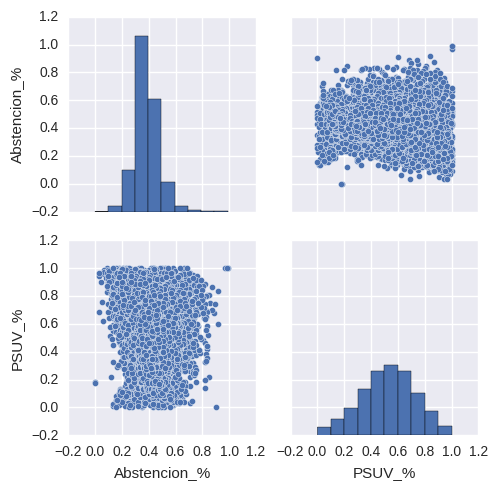

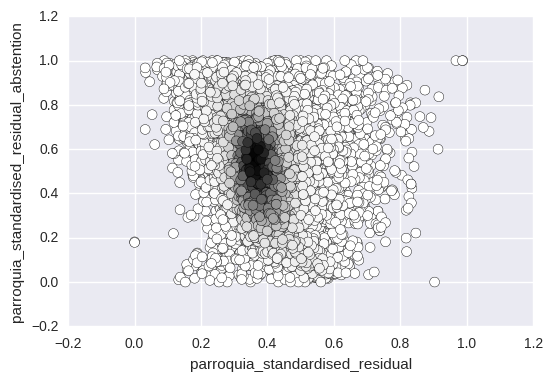

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=50)
plt.xlabel('parroquia_standardised_residual')
plt.ylabel('parroquia_standardised_residual_abstention')
plt.show()

#c = plt.contour(df_out['parroquia_standardised_residual'], df_out['parroquia_standardised_residual_abstention'],z,colors='r',linewidths=4,linestyles='dotted')
#plt.show()

# Metrics:

Main metric is the Standardised residuals (SR) or Z-score:


residual_centro = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{centro}})$ 

residual_parroquia = $(1 -\frac{\%Psuv_{mesa}}{\%Psuv_{parroquia}})$

$\underline{Standardised Residual}$ = $\frac{residual}{\sigma_{residual}}$ for each level (centro, parroquia, municipio...)

Deviations in favour of PSUV are shown on negative values of SR.

# Standardised residual for each mesa with respect to its centro (only centros with more than 1 'mesa'):

Gaussian distribution, if an external source affects the result in a 'mesa', it will affect the whole 'centro electoral'.

No large relative effect observed (slight tails), this can be our control sample. 


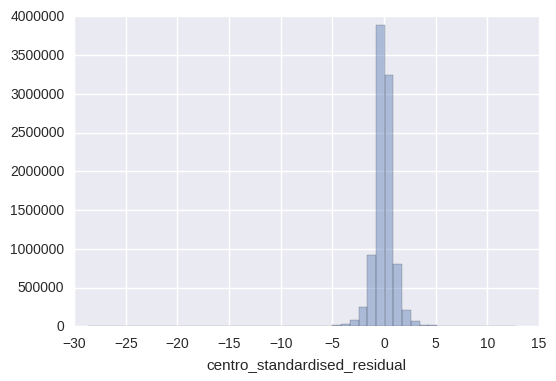

In [17]:
sns.distplot(df_out[df_out['centro_standardised_residual'] != 0]['centro_standardised_residual'],
                 hist_kws={'weights': df_out[df_out['centro_standardised_residual'] != 0]['VOTOS VALIDOS']},
                 kde=False, label="centro == 1 mesa")

# Standardised residual for each mesa with respect to its 'parroquia':

Observing slighly larger tails on the negative side, where PSUV would show larger percentange of votes wrt the result in the parroquia.

All histograms are normalised by number of valid votes in the centre.


 === inclusive data (all mesas) === 
mean: -0.0573072045827
std: 0.970147029858 
 === centros with only 1 mesa === 
mean:  -0.5646304314
std: 1.06705264317
PSUV N Votes: 1078727.0
MUD N Votes: 528280.0
 === centros with more than 1 mesa === 
mean: 0.0882780588697
std: 0.88854984952
PSUV N Votes: 4684058.0
MUD N Votes: 4659331.0
Inclusive
1533.0
Only 1 table
342.0
More than 1 table
1191.0


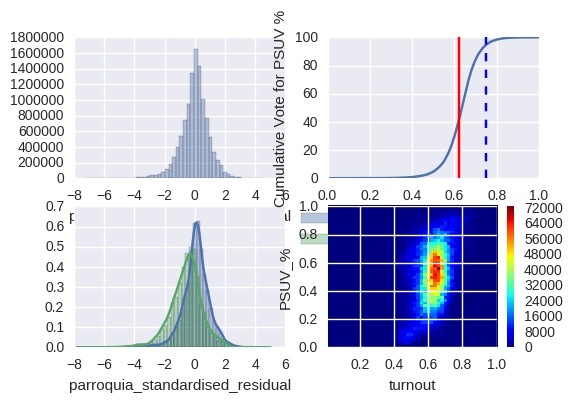

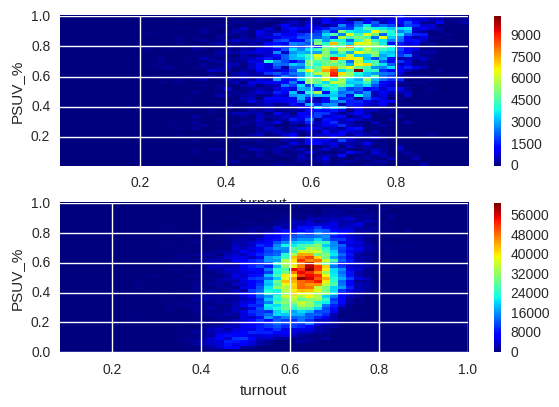

In [18]:
do_all(df_out)


 === centros with only 1 mesa === 
mean:  -0.5646304314
std: 1.06705264317
PSUV N Votes: 1078727.0
MUD N Votes: 528280.0
 === centros with more than 1 mesa === 
mean: 0.0882780588697
std: 0.88854984952
PSUV N Votes: 4684058.0
MUD N Votes: 4659331.0


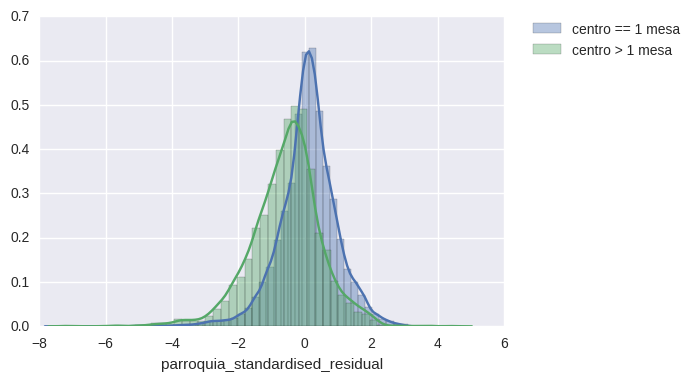

In [8]:
do_SR_mesa(df_out)


# RESULTS PER STATE:

Effect changes from state to state:
## MERIDA

Visible asymmetry on tails for the parroquia SR.

 === inclusive data (all mesas) === 
mean: -0.0792822034186
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.622097384895
std: 1.14206188788
PSUV N Votes: 38600.0
MUD N Votes: 23554.0
 === centros with more than 1 mesa === 
mean: 0.104439858004
std: 0.874582294479
PSUV N Votes: 143220.0
MUD N Votes: 174978.0


make_figures.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['turnout'] = 1 - df['Abstencion_%']


Inclusive
52.0
Only 1 table
13.0
More than 1 table
39.0


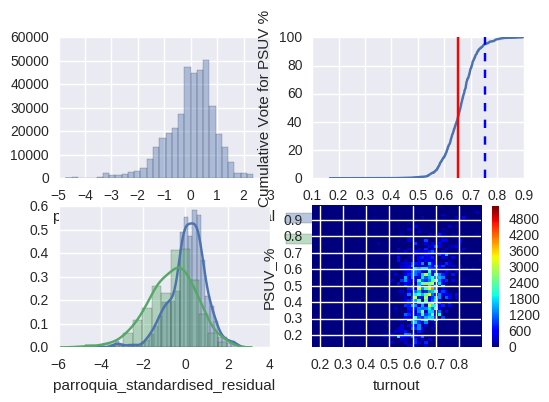

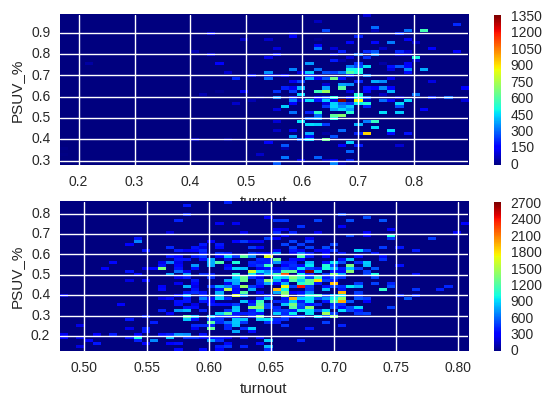

In [11]:
do_all(df_out[df_out['estado']=='EDO. MERIDA'])
#do_SR(df_out_Merida)

## VARGAS

 === inclusive data (all mesas) === 
mean: -0.0509660455604
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.795549370494
std: 0.982239135124
PSUV N Votes: 18078.0
MUD N Votes: 9180.0
 === centros with more than 1 mesa === 
mean: 0.147999746502
std: 0.907659795159
PSUV N Votes: 76605.0
MUD N Votes: 72362.0
Inclusive
23.0
Only 1 table
5.0
More than 1 table
18.0


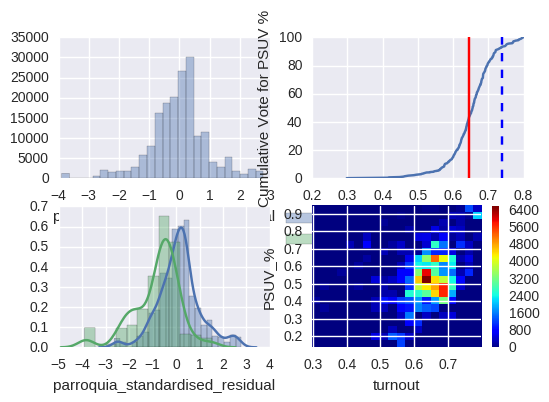

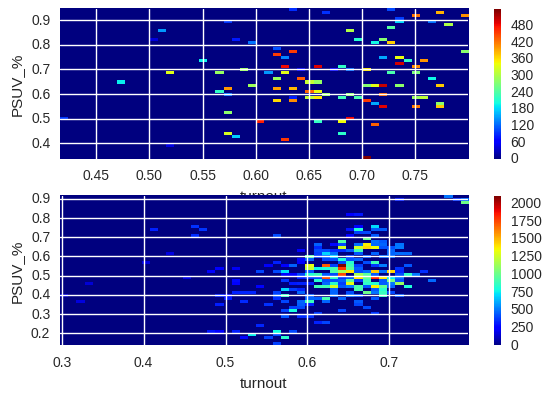

In [20]:
do_all(df_out[df_out['estado']=='EDO. VARGAS'],20)


## MONAGAS

 === inclusive data (all mesas) === 
mean: -0.101190667188
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.818067740559
std: 1.02378704387
PSUV N Votes: 52234.0
MUD N Votes: 23521.0
 === centros with more than 1 mesa === 
mean: 0.160991996474
std: 0.85246242578
PSUV N Votes: 170847.0
MUD N Votes: 157686.0
Inclusive
53.0
Only 1 table
14.0
More than 1 table
39.0


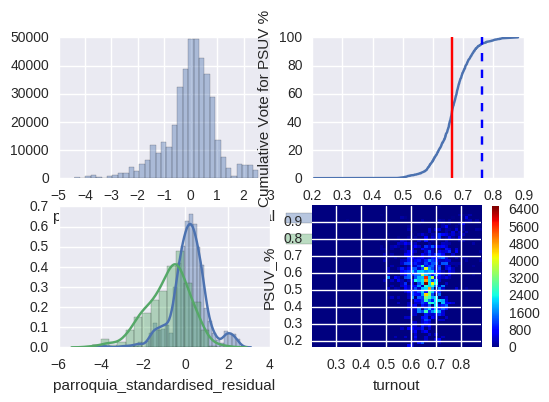

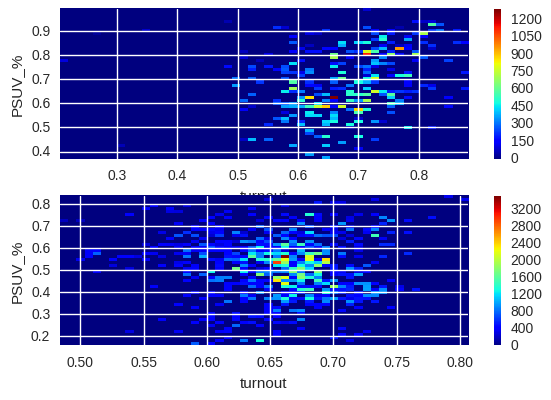

In [21]:
do_all(df_out[df_out['estado']=='EDO. MONAGAS'])


## Delta Amacuro

 === inclusive data (all mesas) === 
mean: -0.168656530115
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.489166146974
std: 1.19699100608
PSUV N Votes: 20701.0
MUD N Votes: 10474.0
 === centros with more than 1 mesa === 
mean: 0.175115881515
std: 0.559872129762
PSUV N Votes: 26185.0
MUD N Votes: 19214.0
Inclusive
13.0
Only 1 table
7.0
More than 1 table
6.0


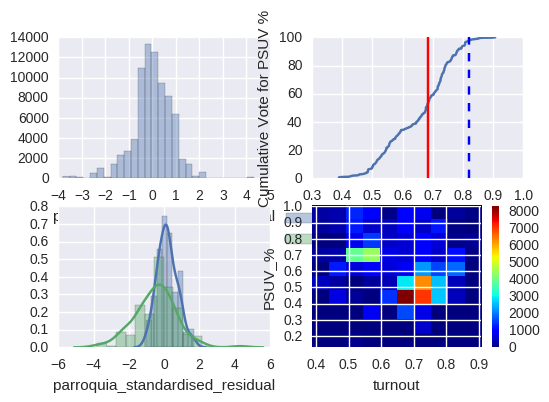

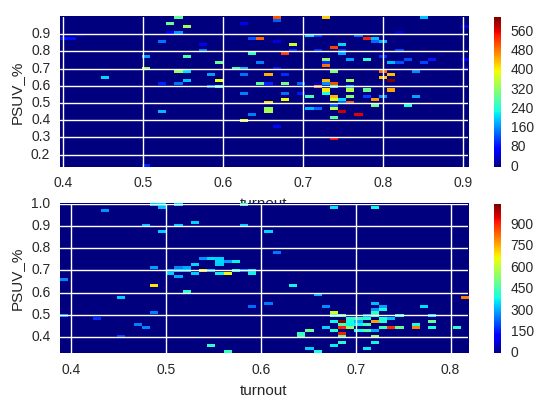

In [23]:
do_all(df_out[df_out['estado']=='EDO. DELTA AMACURO'],10)


In [ ]:
do_SR_mesa(df_deltaA)

## MIRANDA

 === inclusive data (all mesas) === 
mean: 0.0132442704759
std: 0.999643305848 
 === centros with only 1 mesa === 
mean:  -0.490528289214
std: 0.876930925414
PSUV N Votes: 83567.0
MUD N Votes: 23860.0
 === centros with more than 1 mesa === 
mean: 0.0859892457858
std: 0.995426666039
PSUV N Votes: 544820.0
MUD N Votes: 527939.0
Inclusive
159.0
Only 1 table
20.0
More than 1 table
139.0


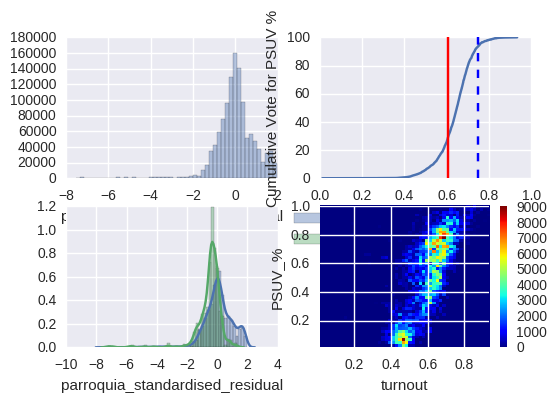

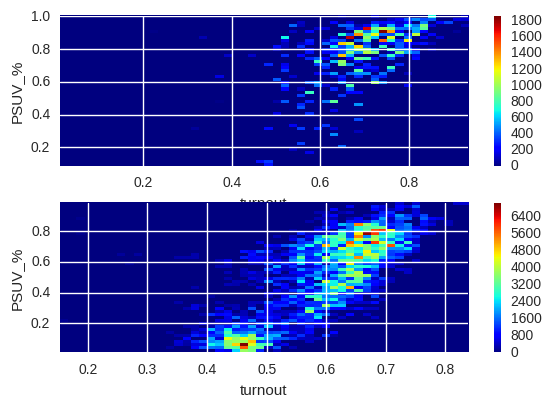

In [24]:
do_all(df_out[df_out['estado']=='EDO. MIRANDA'])



## LARA

 === inclusive data (all mesas) === 
mean: -0.037835351777
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.548423246459
std: 0.918723292918
PSUV N Votes: 109723.0
MUD N Votes: 30200.0
 === centros with more than 1 mesa === 
mean: 0.138196509669
std: 0.966117320842
PSUV N Votes: 361622.0
MUD N Votes: 294682.0
Inclusive
108.0
Only 1 table
28.0
More than 1 table
80.0


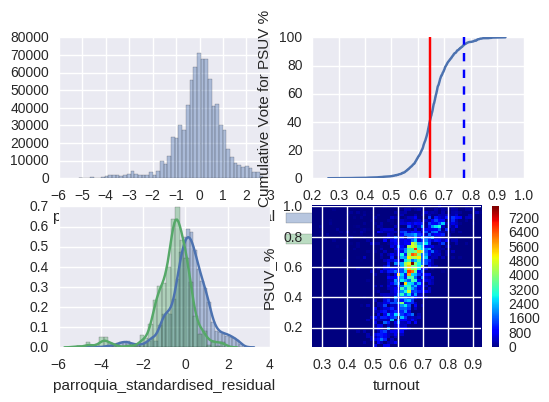

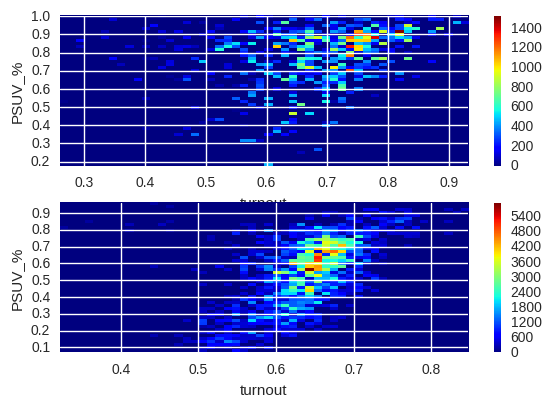

In [25]:
do_all(df_out[df_out['estado']=='EDO. LARA'])



## ZULIA


 === inclusive data (all mesas) === 
mean: -0.0493368100233
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.915897505873
std: 1.16198464272
PSUV N Votes: 85748.0
MUD N Votes: 35787.0
 === centros with more than 1 mesa === 
mean: 0.0661355743056
std: 0.91667412491
PSUV N Votes: 559833.0
MUD N Votes: 664083.0
Inclusive
190.0
Only 1 table
22.0
More than 1 table
167.0


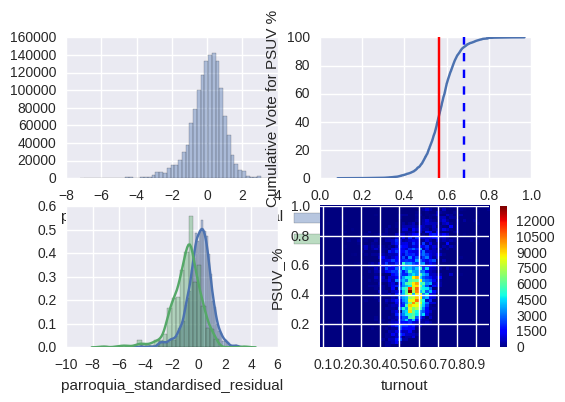

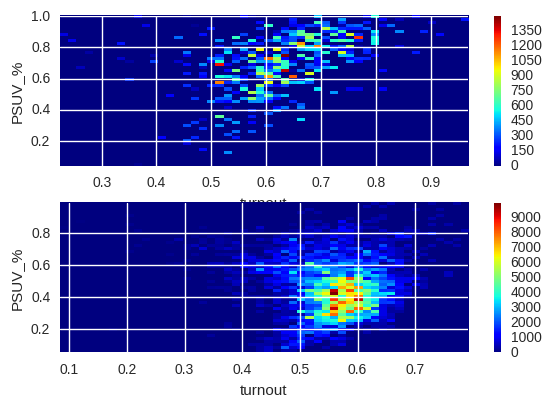

In [26]:
do_all(df_out[df_out['estado']=='EDO. ZULIA'])


## BOLIVAR

 === inclusive data (all mesas) === 
mean: -0.0297949753276
std: 0.356603203963 
 === centros with only 1 mesa === 
mean:  -0.189998376778
std: 0.384655985412
PSUV N Votes: 41438.0
MUD N Votes: 24487.0
 === centros with more than 1 mesa === 
mean: 0.0151019966636
std: 0.335012962278
PSUV N Votes: 234789.0
MUD N Votes: 250471.0
Inclusive
82.0
Only 1 table
18.0
More than 1 table
64.0


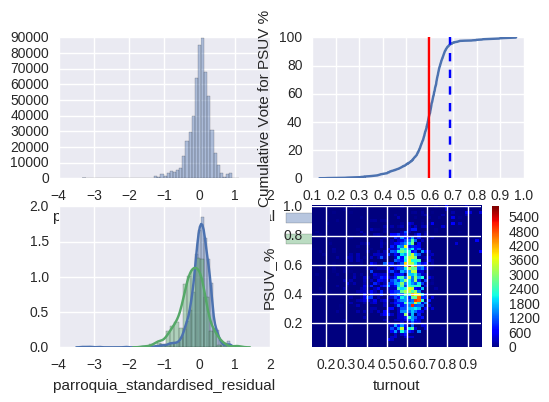

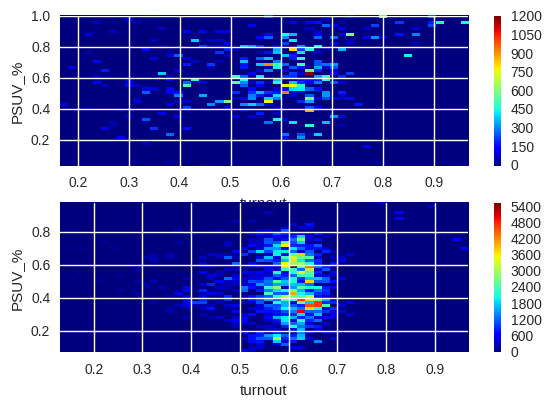

In [27]:
do_all(df_out[df_out['estado']=='EDO. BOLIVAR'])


## TACHIRA 

 === inclusive data (all mesas) === 
mean: -0.087697898754
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.678568043762
std: 1.3458039216
PSUV N Votes: 38422.0
MUD N Votes: 41042.0
 === centros with more than 1 mesa === 
mean: 0.100787559689
std: 0.771749464121
PSUV N Votes: 143334.0
MUD N Votes: 283811.0
Inclusive
74.0
Only 1 table
18.0
More than 1 table
56.0


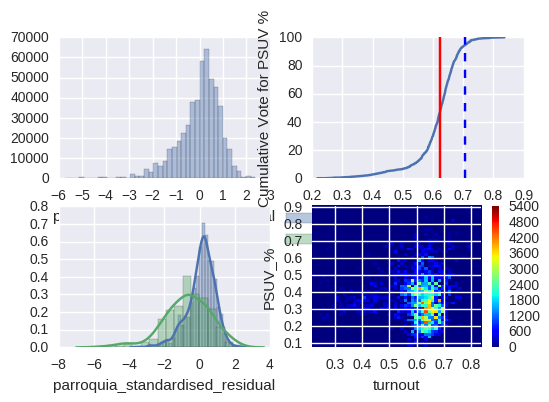

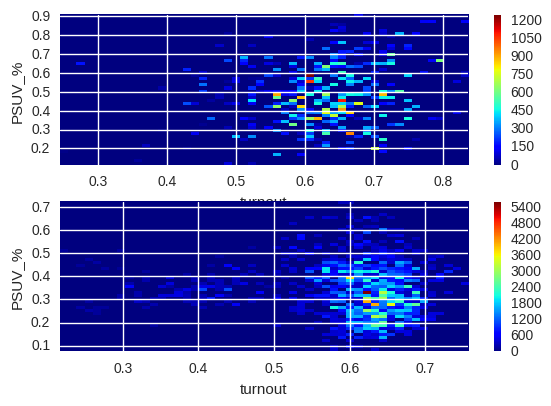

In [29]:
do_all(df_out[df_out['estado']=='EDO. TACHIRA'])


## CARABOBO 

 === inclusive data (all mesas) === 
mean: -0.0327528967197
std: 1.0 
 === centros with only 1 mesa === 
mean:  -0.733097972191
std: 0.770407053744
PSUV N Votes: 41788.0
MUD N Votes: 12262.0
 === centros with more than 1 mesa === 
mean: 0.0315048998249
std: 0.994199443785
PSUV N Votes: 444916.0
MUD N Votes: 408622.0
Inclusive
118.0
Only 1 table
10.0
More than 1 table
108.0


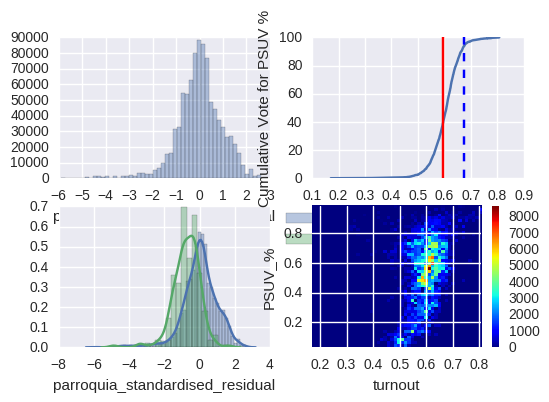

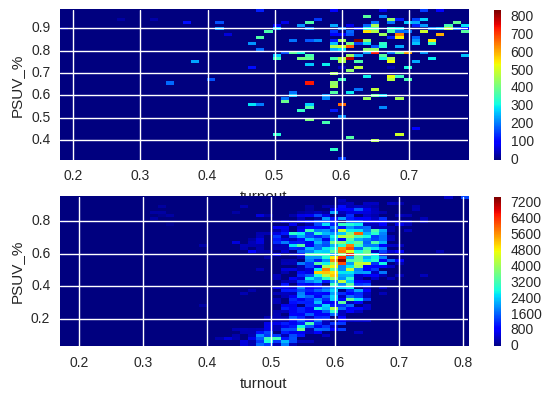

In [30]:
do_all(df_out[df_out['estado']=='EDO. CARABOBO'])
